In [118]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
words = open("names.txt", 'r').read().split()

In [122]:
N = torch.zeros((27, 27)).int()

In [123]:
chars = sorted(set(''.join(words)))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [124]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs[:-1], chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

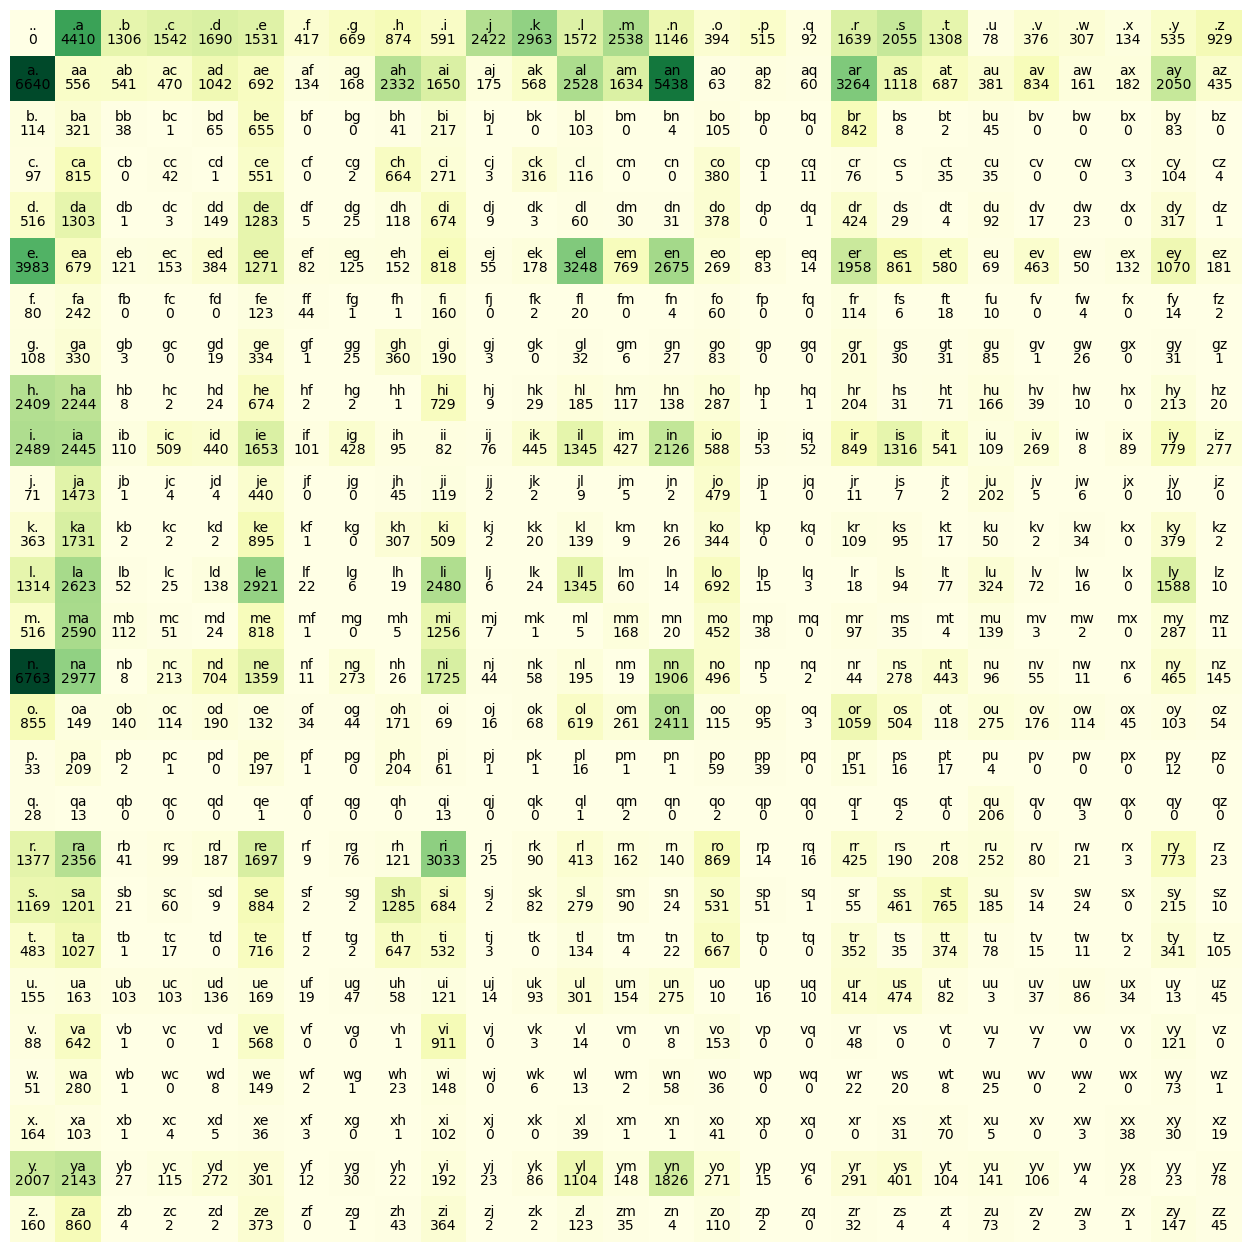

In [125]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="YlGn")
for i in range(len(N)):
    for j in range(len(N)):
        chs = itos[i] + itos[j]
        plt.text(j, i, chs, ha="center", va="bottom", color="black")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="black")
plt.axis('off');

In [127]:
p = N.float()
p /= p.sum(axis=1, keepdims=True)
p.shape

torch.Size([27, 27])

# Build neural network

In [383]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs[:-1], chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = len(xs)
print(f'number of examples: {num}')

number of examples: 228146


In [384]:
# convert numpy to torch tensor
xenc = F.one_hot(xs, num_classes=27).float()
# plt.imshow(xenc);

In [385]:
# w = np.random.randn(27, 27)*0.01

# def one_hot(a):
#     b = np.zeros((a.size, 27))
#     b[np.arange(a.size), a] = 1
#     return b.astype('float32')

# # forward pass
# xenc = one_hot(xs) # one-hot encoding
# logits = xenc.dot(w) # predict logits
# exp_z = np.exp(logits)
# probs = exp_z / np.sum(exp_z, axis=1, keepdims=True) # softmax probs
# # np.sum(probs, axis=1, keepdims=True)
# loss = np.average(-np.log(probs[np.arange(len(ys)), ys])) # avg loss log probs
# loss

In [390]:
g = torch.Generator().manual_seed(47)
w = torch.randn(27, 27, generator=g, requires_grad = True) 

In [394]:
lr = 2e-0
reg = 1e-2

for i in range(1500+1):
    # forward pass
    logits = xenc @ w
    exp_z = logits.exp()
    probs = exp_z / exp_z.sum(axis=1, keepdims=True)
    # probs.sum(axis=1, keepdims=True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean() + reg*(w**2).mean()
    if i % 100 == 0:
        print(f"loss: {loss:.4f}")

    # backward pass
    w.grad = None # set zero gradient
    loss.backward() # loss backward
    w.data += -lr*w.grad # update step

loss: 2.5034
loss: 2.5014
loss: 2.4997
loss: 2.4981
loss: 2.4968
loss: 2.4956
loss: 2.4945
loss: 2.4935
loss: 2.4926
loss: 2.4918
loss: 2.4911
loss: 2.4904
loss: 2.4898
loss: 2.4892
loss: 2.4887
loss: 2.4882


In [414]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(10):
    ix  = 0
    name = []
    while True:
        xenc =  F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ w
        exp_z = logits.exp()
        probs = exp_z / exp_z.sum()
        # ix = torch.argmax(probs)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        c = itos[ix]
        name.append(c)
        if ix == 0 :
            break
    print(''.join(name))

junide.
janasah.
prelay.
a.
nn.
kohin.
tolian.
juwe.
ksahnaauranilevias.
dedainrwieta.
